In [5]:
# Load libraries for analysis and visualization
import pandas as pd # collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np  # foundational package for scientific computing
import re           # Regular expression operations
import matplotlib.pyplot as plt # Collection of functions for scientific and publication-ready visualization
from collections import Counter
import pickle
%matplotlib inline

# Machine learning libraries
import xgboost as xgb  # Implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning
import seaborn as sns  # Visualization library based on matplotlib, provides interface for drawing attractive statistical graphics
import sklearn         # Collection of machine learning algorithms
import sklearn.ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier)
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [7]:
df_train = pd.read_pickle('train_cleaned_df.pk')
df_test = pd.read_pickle('test_cleaned_df.pk')


In [8]:
remove_cols = ['Name','PetID','RescuerID']#,'Type','NameFrequency'

In [10]:
SEED = 111

X = df_train.drop(remove_cols, axis=1)

X = X.drop(['AdoptionSpeed'],axis=1)

y = df_train['AdoptionSpeed']

X.shape, y.shape, df_test.shape

((14993, 26), (14993,), (3948, 29))

In [13]:
#Copy for holdout test run
X_test = df_test.copy()
X_test = X_test.drop(remove_cols, axis=1)

In [14]:
X_test.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,State,VideoAmt,Description,PhotoAmt,NumColors,IsMixedBreed,NameFrequency,Magnitude,Score,WordCount
0,1,2,307,0,1,1,0,0,2,2,...,41326,0,"Puppy is calm for a young dog, but he becomes ...",3.0,1,0,11,0.0,0.0,20
1,2,24,266,0,1,2,7,0,2,1,...,41326,0,Urgently seeking adoption. Please contact for ...,1.0,2,0,3,0.0,0.0,8
2,2,20,266,0,2,7,0,0,2,1,...,41326,0,Snowball... doesn't look so good (she is healt...,1.0,1,0,1,0.0,0.0,36
3,2,5,266,252,2,1,6,7,2,1,...,41326,0,"Malibu: Female, Local Mix, 4-5 months, vaccina...",1.0,3,1,1,0.0,0.0,51
4,1,6,307,0,2,1,2,7,2,1,...,41326,0,LALA! That's my name. I'm a 6 month old girl d...,1.0,3,0,1,0.0,0.0,33


In [15]:
X.shape, X_test.shape

((14993, 26), (3948, 26))

In [20]:
X.info()
print("------------")
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 26 columns):
Type             14993 non-null int64
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
VideoAmt         14993 non-null int64
Description      14993 non-null object
PhotoAmt         14993 non-null float64
NumColors        14993 non-null int64
IsMixedBreed     14993 non-null int64
NameFrequency    14993 non-null int64
Magnitude     

In [21]:
X = X.drop("Description", axis=1)
X_test = X_test.drop("Description", axis=1)

In [23]:
petid = df_test['PetID']

In [24]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [34]:
# Cross validate model with Kfold stratified cross validation
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10)

In [35]:
# ExtraTrees 
ExtC = ExtraTreesClassifier()

ex_param_grid = {'max_depth': [6,7,8,9], 'max_features': [7,8,9,10],  
              'n_estimators': [50, 100, 200]}

gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsExtC.fit(X_train,Y_train)
ExtC_best = gsExtC.best_estimator_
gsExtC.best_score_

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.1min finished


0.38342067651262507

In [38]:
# Random Forest
random_forest = RandomForestClassifier()

rf_param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [6,7,8,9,10],  
              'min_samples_split': [5, 6, 7, 8]}

gsrandom_forest = GridSearchCV(random_forest,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsrandom_forest.fit(X_train,Y_train)
# Best score
random_forest_best = gsrandom_forest.best_estimator_
gsrandom_forest.best_score_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.2s finished


0.39656979514054314

In [39]:
#XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
param_grid = {'max_depth': [5,6,7,8], 'gamma': [1, 2, 4], 'learning_rate': [0.1, 0.2, 0.3, 0.5]}

xgb_grid = GridSearchCV(xgb, param_grid, cv=kfold, refit=True, verbose=1, n_jobs= -1)
xgb_grid.fit(X_train,Y_train)

# Best score
xgb_best = xgb_grid.best_estimator_
xgb_grid.best_score_

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 11.4min finished


0.4081943782753692

In [40]:
#LightGBM
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(silent=False)
param_grid = {"max_depth": [8,10,15], "learning_rate" : [0.008,0.01,0.012], 
              "num_leaves": [80,100,120], "n_estimators": [200,250]  }

lgbm_grid = GridSearchCV(lgbm, param_grid, cv=kfold, refit=True, verbose=1, n_jobs= -1)
lgbm_grid.fit(X_train,Y_train, verbose=True)

# Best score
lgbm_best = lgbm_grid.best_estimator_
lgbm_grid.best_score_     

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 14.2min finished


0.406574559313959

In [41]:
# Save boosted models
pickle.dump(random_forest_best, open("Pet_RF.pkl", 'wb'))
pickle.dump(ExtC_best, open("Pet_ExtC.pkl", 'wb'))
pickle.dump(xgb_grid, open("Pet_XGB.pkl", 'wb'))
pickle.dump(lgbm_grid, open("Pet_LGBM.pkl", 'wb'))

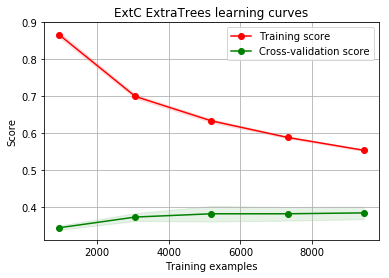

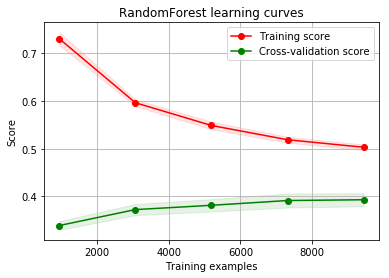

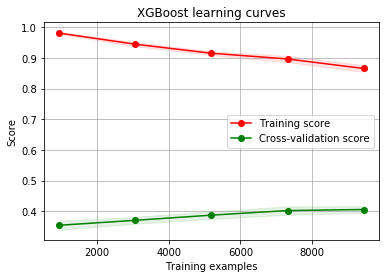

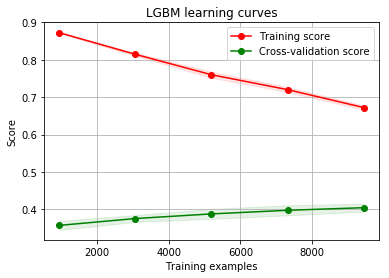

In [42]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt
g = plot_learning_curve(gsExtC.best_estimator_,"ExtC ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsrandom_forest.best_estimator_,"RandomForest learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(xgb_grid.best_estimator_,"XGBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(lgbm_grid.best_estimator_,"LGBM learning curves",X_train,Y_train,cv=kfold)

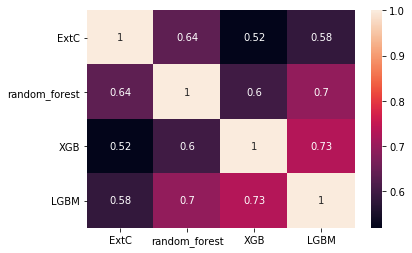

In [43]:
test_Adopted_ExtC = pd.Series(ExtC_best.predict(X_test), name="ExtC")
test_Adopted_random_forest = pd.Series(random_forest_best.predict(X_test), name="random_forest")
test_Adopted_XG = pd.Series(xgb_grid.predict(X_test), name="XGB")
test_Adopted_LGBM = pd.Series(lgbm_grid.predict(X_test), name="LGBM")

# Concatenate all classifier results
ensemble_results = pd.concat([test_Adopted_ExtC, test_Adopted_random_forest, test_Adopted_XG, test_Adopted_LGBM],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

In [44]:
VotingPredictor = VotingClassifier(estimators=[('XGB', xgb_best), ('ExtC',ExtC_best), ('LGBM',lgbm_best), \
                                               ('random_forest', random_forest_best)], voting='soft', n_jobs=4)
VotingPredictor = VotingPredictor.fit(X_train, Y_train)

In [45]:
pickle.dump(VotingPredictor, open("Pet_Voting_Pred_Model.pkl", 'wb'))

In [46]:
VotingPredictor_ld = pickle.load(open("Pet_Voting_Pred_Model.pkl", 'rb'))

In [47]:
VotingPredictor_predictions = VotingPredictor_ld.predict(X_test)
test_AdoptionSpeed= pd.Series(VotingPredictor_predictions, name="AdoptionSpeed")

In [48]:
# Preparing data for Submission
Submission = pd.concat([petid,test_AdoptionSpeed],axis=1)
Submission.head(10)

,PetID,AdoptionSpeed
0,378fcc4fc,1
1,73c10e136,4
2,72000c4c5,4
3,e147a4b9f,4
4,43fbba852,4
5,77a490ec9,4
6,28c4b1b13,4
7,d1eada628,4
8,d134dec34,4
9,bcd464bb8,1


In [50]:
Submission.to_csv("sample_submission.csv", index=False)
print("Completed.")

Completed.


In [55]:
ss = pd.read_csv("sample_submission.csv")

In [56]:
ss

,PetID,AdoptionSpeed
0,378fcc4fc,1
1,73c10e136,4
2,72000c4c5,4
3,e147a4b9f,4
4,43fbba852,4
5,77a490ec9,4
6,28c4b1b13,4
7,d1eada628,4
8,d134dec34,4
9,bcd464bb8,1


In [53]:
ss.to_csv("sample_submission.csv", index=False)